In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 5
%autosave 15

import operator
import functools
import numpy as np
import scipy as sp
import pandas as pd
import math
import random
import pylab as pl
import matplotlib.pyplot as plt
import sklearn
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score, f1_score
from scipy.spatial.distance import euclidean, cityblock, cosine, correlation
from IPython.display import display, HTML
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error



Autosaving every 15 seconds


In [2]:
data = pd.read_table("prices.txt", sep=",") #area, rooms, price

error= 0.0091889781138
[0.03525591861489586, 0.7658492068436576, 0.16986136469115803]
[24675.617438565612, 119.70028134655561, 23777.193829468302]
error abs sqrt = 67091.83306420308
err average =  54264.936170212764


,area,rooms,price,predict
0,2104.0,3.0,399900.0,347856.0
1,1600.0,3.0,329900.0,287527.0
2,2400.0,3.0,369000.0,383287.0
3,1416.0,2.0,232000.0,241725.0
4,3000.0,4.0,539900.0,478885.0
5,1985.0,4.0,299900.0,357389.0
6,1534.0,3.0,314900.0,279627.0
7,1427.0,3.0,198999.0,266819.0
8,1380.0,3.0,212000.0,261193.0
9,1494.0,3.0,242500.0,274839.0


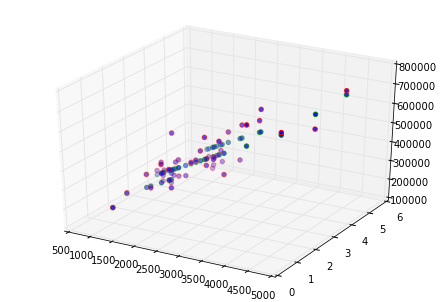

2000 3
335407.7616200817


In [22]:
dataMatrix = data.as_matrix()
x1 = [float(p[0]) for p in dataMatrix]
x2 = [float(p[1]) for p in dataMatrix]
y = [float(p[2]) for p in dataMatrix]
xMax1 = max(x1)
xMax2 = max(x2)
yMax = max(y)
y_test = [yy / yMax for yy in y]
x_test = [[1, x1[i] / xMax1, x2[i] / xMax2] for i in range(len(x1))]
coefficients = [0, 1, 1]
alpha = 0.5
num = 1
border = 0.0046
error = 10000
while (error > border):
    cur = []
    for p in x_test:
        cur.append(sum(a * b for a, b in zip(p, coefficients)))
    error = mean_squared_error(cur, y_test) * 0.5
    newC = []
    for j in range(len(coefficients)):
        ssum = 0
        for i in range(len(x_test)):
            ssum += (cur[i] - y_test[i]) * x_test[i][j]
        newC.append(coefficients[j] - alpha * ssum / len(x_test))
    coefficients = newC
    num += 1
predicts = [coefficients[0] + x[1] * coefficients[1] + x[2] * coefficients[2] for x in x_test]
print('error=', mean_squared_error(y_test, predicts))
# showP(x1, x2, y_test, res)
resValues = pd.DataFrame(columns=['area', 'rooms', 'price', 'predict'])
print(coefficients)
coef1 = [coefficients[0] * yMax, coefficients[1] / xMax1 * yMax, coefficients[2] / xMax2 * yMax]
print(coef1)
predicts2 = [int(coef1[0] + x1[i] * coef1[1] + x2[i] * coef1[2]) for i in range(len(x1))]
print('error abs sqrt =', math.sqrt(mean_squared_error(y, predicts2)))
errAverage = 0
for i in range(len(predicts)):
    cur = pd.DataFrame([[x1[i], x2[i], y[i], predicts2[i]]], columns=['area', 'rooms', 'price', 'predict'])
    errAverage += abs(y[i] - predicts2[i])
    resValues = resValues.append(cur, ignore_index=True)
errAverage /= len(predicts)
print("err average = ", errAverage)
display(resValues)
show(x1, x2, y, predicts2)
area, rooms = map(int, input().split())
print(coef1[0] + area * coef1[1] + rooms * coef1[2])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[['area', 'rooms']], data['price'], test_size=0.10, random_state=23)

lin_reg = LinearRegression(normalize='True')
lin_reg.fit(X_train, y_train)
scores =  cross_val_score(lin_reg, X_train, y_train, cv=5)
print("Score on train: %f" % lin_reg.score(X_train, y_train))
print("Score on test: %f" % lin_reg.score(X_test, y_test))
print(lin_reg.predict(X_test))
print(y_test)

Score on train: 0.662442
Score on test: 0.919828
[ 241169.70448455  409511.44855054  236887.0844699   328714.50629404
  648516.4228583 ]
14    259900
18    499998
17    199900
30    349900
13    699900
Name: price, dtype: int64


In [19]:
def show(x, y, z, zz):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(xs=x, ys=y, zs=z, zdir='z', color='r')
    ax.scatter(xs=x, ys=y, zs=zz, zdir='z', label='ss', color='g')
    plt.show()

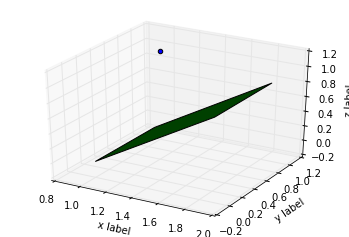

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')   
plt.hold(True)

x_surf=np.arange(1, 2, 0.1)   
y_surf=np.arange(0, 1, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = np.arange(0, 1, 0.1)
ax.plot_surface(x_surf, y_surf, z_surf, color='g'); 
ax.scatter(xs=[1], ys=[1], zs=[1], zdir='z', label='ys=0, zdir=z')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

plt.show()

In [7]:
def showP(x, y, z, coef):
    fig = plt.figure()
    ax = fig.gca(projection='3d')   
    plt.hold(True)
#     x_surf, y_surf = np.meshgrid(x, y)
    z_surf = [coef[0] + coef[1] * p[0] + coef[2] * p[2] for p in data]
#     ax.plot_surface(x_surf, y_surf, z_surf, color='r'); 
    ax.scatter(xs=x, ys=z, zs=y, color='g')
    ax.scatter(xs=x, ys=z_surf, zs=y, color='r')
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.set_zlabel('z label')
    plt.show()

In [8]:
print(list(map(sum, zip([1,2],[3,4]))))

[4, 6]


In [9]:
print(coefficients)
area, rooms = map(int, input().split())
print(coefficients[0] + area * coefficients[1] + rooms * coefficients[2])

[0.03525591861489586, 0.7658492068436576, 0.16986136469115803]
2 3120
531.5344121687152
